#### Predict price high and price low using past 60-day, 30-day, 7-day, and 1-day prices. 
#### Train model using all the price_low_usd data, then fit price_usd_high to the model to predict price_usd_high from 01/01/2019 to 02/29/2020. Then compare the predicted price_high_usd with the actual ones.
#### Train model using all the price_high_usd data, then fit price_usd_low to the model to predict price_usd_low from 01/01/2019 to 02/29/2020. Then compare the predicted price_low_usd with the actual ones.

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# Import data

In [41]:
df = pd.read_csv("CrypotQuant_BTC_20190101-20200229.csv")
df = df.iloc[::-1]
df['date'] = pd.to_datetime(df['date'])
df.head
df['date'] = pd.to_datetime(df.date,format='%Y-%m-%d')
df.index = df['date']


# Clean data

In [42]:
data = df.sort_index(ascending=True, axis=0)
new_data1 = pd.DataFrame(index=range(0,len(df)),columns=['date', 'price_usd_high'])
for i in range(0,len(data)):
    new_data1['date'][i] = data['date'][i]
    new_data1['price_usd_high'][i] = data['price_usd_high'][i]
#    new_data['price_usd_low'][i] = data['price_usd_low'][i]
new_data1.index = new_data1.date
new_data1.drop('date', axis=1, inplace=True)

In [43]:
data = df.sort_index(ascending=True, axis=0)
new_data2 = pd.DataFrame(index=range(0,len(df)),columns=['date', 'price_usd_low'])
for i in range(0,len(data)):
    new_data2['date'][i] = data['date'][i]
#    new_data2['price_usd_high'][i] = data['price_usd_high'][i]
    new_data2['price_usd_low'][i] = data['price_usd_low'][i]
new_data2.index = new_data2.date
new_data2.drop('date', axis=1, inplace=True)



In [44]:
dataset1 = new_data1.values #high
dataset2 = new_data2.values #low

# Predict price high

## Clean data 

In [45]:
train = dataset2[0:425,] #low

In [46]:
valid = dataset1[0:425,] #high

In [47]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data1 = scaler.fit_transform(dataset1) #high
scaled_data2 = scaler.fit_transform(dataset2) #low

## Timestamp = 60 

In [48]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data2[i-60:i,0])
    y_train.append(scaled_data2[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [49]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [50]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

365/365 - 6s - loss: 0.0127


In [51]:
inputs = valid
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [52]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [53]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)


In [54]:
rms=np.sqrt(np.mean(np.power((valid[60:]-pred_price),2)))
rms

646.391293744557

<ipython-input-63-baa621f9538f>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



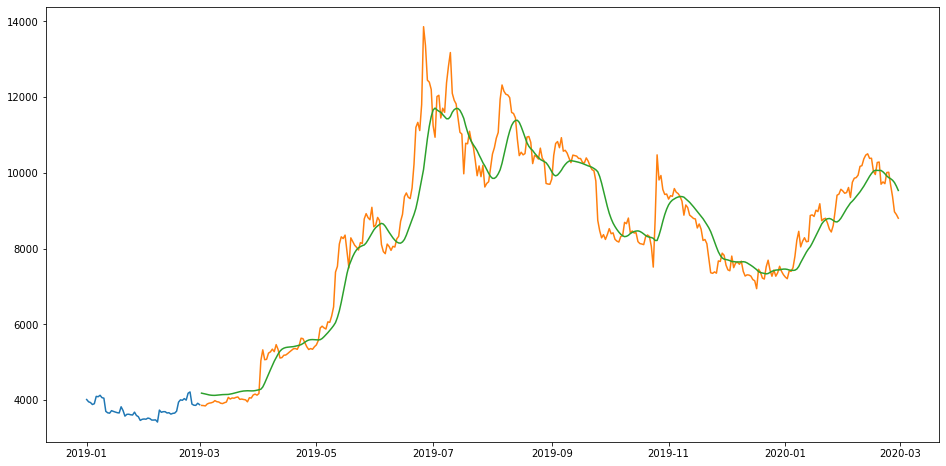

In [63]:
plt.figure(figsize=(16,8))
df1 = df[:60]
df2 = df[60:]
df2['pred'] = pred_price

plt.plot(df1['price_usd_high'])
plt.plot(df2['price_usd_high'])
plt.plot(df2['pred'])

## Timestamp=30

In [64]:
x_train, y_train = [], []
for i in range(30,len(train)):
    x_train.append(scaled_data2[i-30:i,0])
    y_train.append(scaled_data2[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [65]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

395/395 - 4s - loss: 0.0126


In [66]:
inputs = valid
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)
X_test = []
for i in range(30,inputs.shape[0]):
    X_test.append(inputs[i-30:i,0])
X_test = np.array(X_test)

In [67]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
rms=np.sqrt(np.mean(np.power((valid[30:]-pred_price),2)))
rms

687.8381602150465

<ipython-input-68-9b742866ece8>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



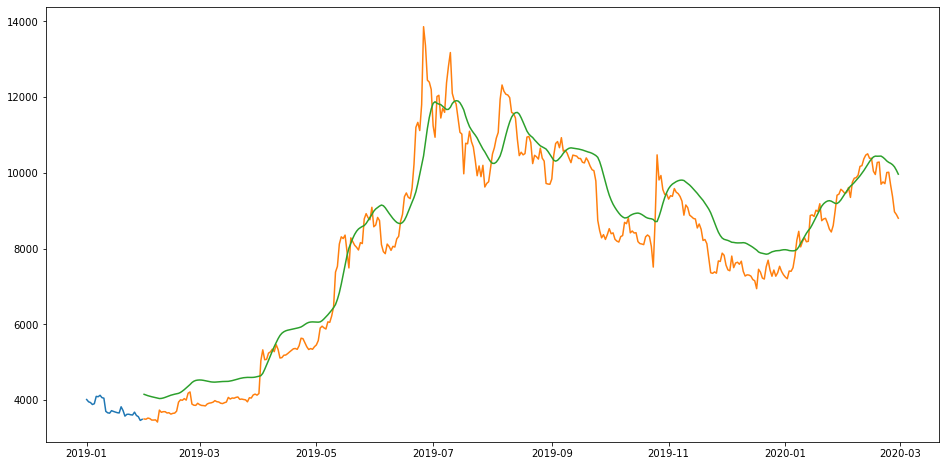

In [68]:
plt.figure(figsize=(16,8))
df1 = df[:30]
df2 = df[30:]
df2['pred'] = pred_price

plt.plot(df1['price_usd_high'])
plt.plot(df2['price_usd_high'])
plt.plot(df2['pred'])

## Timestamp=7

In [69]:
x_train, y_train = [], []
for i in range(7,len(train)):
    x_train.append(scaled_data2[i-7:i,0])
    y_train.append(scaled_data2[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [70]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

418/418 - 2s - loss: 0.0131


In [73]:
inputs = valid
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)
X_test = []
for i in range(7,inputs.shape[0]):
    X_test.append(inputs[i-7:i,0])
X_test = np.array(X_test)

In [74]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
rms=np.sqrt(np.mean(np.power((valid[7:]-pred_price),2)))
rms

684.4023957384704

<ipython-input-75-83b748c5d160>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



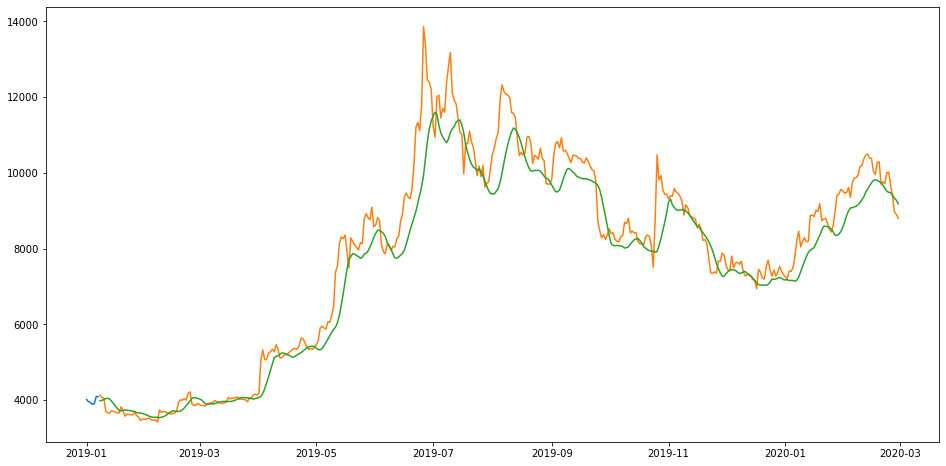

In [75]:
plt.figure(figsize=(16,8))
df1 = df[:7]
df2 = df[7:]
df2['pred'] = pred_price

plt.plot(df1['price_usd_high'])
plt.plot(df2['price_usd_high'])
plt.plot(df2['pred'])

## Timestamp=1

In [76]:
x_train, y_train = [], []
for i in range(1,len(train)):
    x_train.append(scaled_data2[i-1:i,0])
    y_train.append(scaled_data2[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [77]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

424/424 - 1s - loss: 0.0417


In [78]:
inputs = valid
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)
X_test = []
for i in range(1,inputs.shape[0]):
    X_test.append(inputs[i-1:i,0])
X_test = np.array(X_test)

In [79]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
rms=np.sqrt(np.mean(np.power((valid[1:]-pred_price),2)))
rms

394.505046927509

In [81]:
df1 = df[:1]
df2 = df[1:]
df2['pred'] = pred_price
import plotly.graph_objects as go
fig2 = go.Figure()
#fig2 = make_subplots(specs=[[{"secondary_y": True}]])
fig2.add_trace(go.Scatter(x=df1['date'], y=df1['price_usd_high'],name='price_usd_high'))
fig2.add_trace(go.Scatter(x=df2['date'], y=df2['price_usd_high'],name='price_usd_high',line=dict(color="orange")))
fig2.add_trace(go.Scatter(x=df2['date'], y=df2['pred'],name='pred'))

<ipython-input-81-df7ec6cdb25d>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Predict price low

## Clean data 

In [82]:
train1 = dataset1[0:425,] #high
valid1 = dataset2[0:425,] #low

## Timestamp=60

In [90]:
x_train1, y_train1 = [], []
for i in range(60,len(train1)):
    x_train1.append(scaled_data1[i-60:i,0])
    y_train1.append(scaled_data1[i,0])
x_train1, y_train1 = np.array(x_train1), np.array(y_train1)

In [91]:
x_train1 = np.reshape(x_train1, (x_train1.shape[0],x_train1.shape[1],1))

In [92]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train1.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train1, y_train1, epochs=1, batch_size=1, verbose=2)

365/365 - 6s - loss: 0.0086


In [93]:
inputs = valid1
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [94]:
X_test1 = []
for i in range(60,inputs.shape[0]):
    X_test1.append(inputs[i-60:i,0])
X_test1 = np.array(X_test1)

In [97]:
X_test1 = np.reshape(X_test1, (X_test1.shape[0],X_test1.shape[1],1))
pred_price = model.predict(X_test1)
pred_price = scaler.inverse_transform(pred_price)


In [96]:
rms=np.sqrt(np.mean(np.power((valid1[60:]-pred_price),2)))
rms

565.5979035856623

<ipython-input-98-3364f7152af4>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



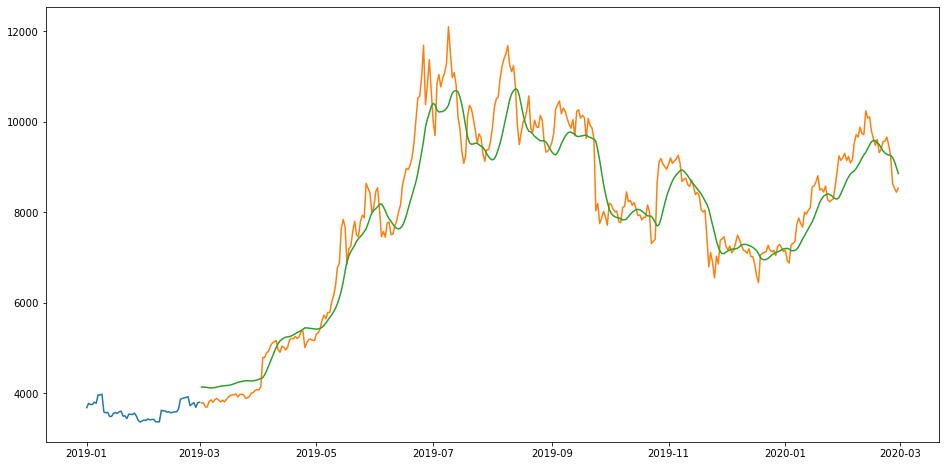

In [98]:
plt.figure(figsize=(16,8))
df1 = df[:60]
df2 = df[60:]
df2['pred'] = pred_price
plt.plot(df1['price_usd_low'])
plt.plot(df2['price_usd_low'])
plt.plot(df2['pred'])


## Timestamp=30

In [99]:
x_train1, y_train1 = [], []
for i in range(30,len(train1)):
    x_train1.append(scaled_data1[i-30:i,0])
    y_train1.append(scaled_data1[i,0])
x_train1, y_train1 = np.array(x_train1), np.array(y_train1)
x_train1 = np.reshape(x_train1, (x_train1.shape[0],x_train1.shape[1],1))

In [100]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train1.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train1, y_train1, epochs=1, batch_size=1, verbose=2)

395/395 - 4s - loss: 0.0101


In [101]:
inputs = valid1
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)
X_test1 = []
for i in range(30,inputs.shape[0]):
    X_test1.append(inputs[i-30:i,0])
X_test1 = np.array(X_test1)

In [102]:
X_test1 = np.reshape(X_test1, (X_test1.shape[0],X_test1.shape[1],1))
pred_price = model.predict(X_test1)
pred_price = scaler.inverse_transform(pred_price)
rms=np.sqrt(np.mean(np.power((valid1[30:]-pred_price),2)))
rms

659.6221662398056

<ipython-input-103-7dad0cba280d>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



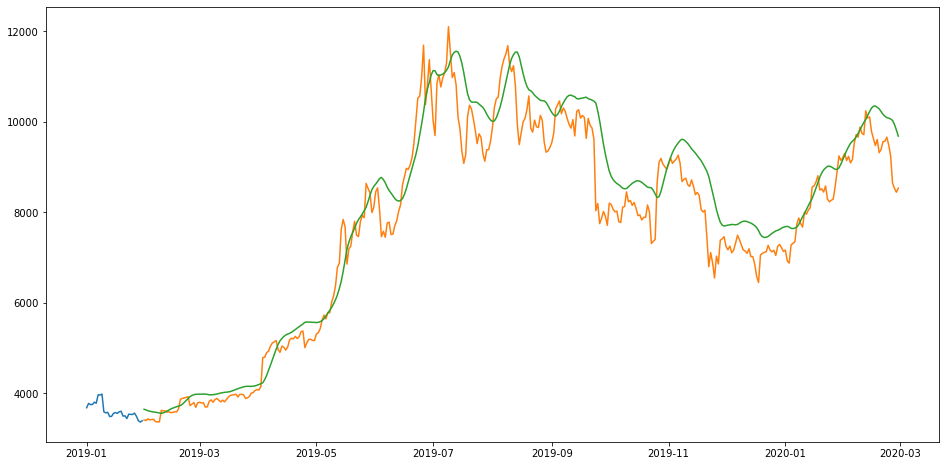

In [103]:
plt.figure(figsize=(16,8))
df1 = df[:30]
df2 = df[30:]
df2['pred'] = pred_price
plt.plot(df1['price_usd_low'])
plt.plot(df2['price_usd_low'])
plt.plot(df2['pred'])

## Timestamp=7

In [105]:
x_train1, y_train1 = [], []
for i in range(7,len(train1)):
    x_train1.append(scaled_data1[i-7:i,0])
    y_train1.append(scaled_data1[i,0])
x_train1, y_train1 = np.array(x_train1), np.array(y_train1)
x_train1 = np.reshape(x_train1, (x_train1.shape[0],x_train1.shape[1],1))

In [106]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train1.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train1, y_train1, epochs=1, batch_size=1, verbose=2)

418/418 - 2s - loss: 0.0095


In [107]:
inputs = valid1
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)
X_test1 = []
for i in range(7,inputs.shape[0]):
    X_test1.append(inputs[i-7:i,0])
X_test1 = np.array(X_test1)

In [108]:
X_test1 = np.reshape(X_test1, (X_test1.shape[0],X_test1.shape[1],1))
pred_price = model.predict(X_test1)
pred_price = scaler.inverse_transform(pred_price)
rms=np.sqrt(np.mean(np.power((valid1[7:]-pred_price),2)))
rms

509.7396081836962

<ipython-input-109-199a135c06a4>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



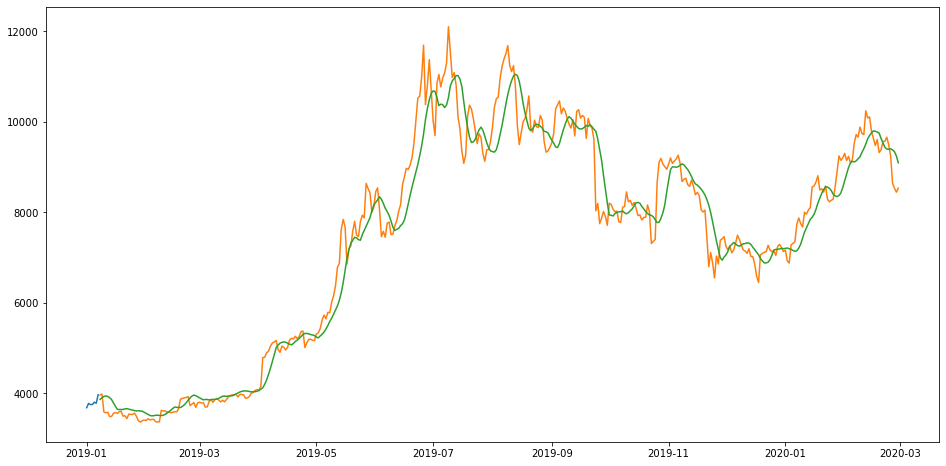

In [109]:
plt.figure(figsize=(16,8))
df1 = df[:7]
df2 = df[7:]
df2['pred'] = pred_price
plt.plot(df1['price_usd_low'])
plt.plot(df2['price_usd_low'])
plt.plot(df2['pred'])

## Timestamp=1

In [110]:
x_train1, y_train1 = [], []
for i in range(1,len(train1)):
    x_train1.append(scaled_data1[i-1:i,0])
    y_train1.append(scaled_data1[i,0])
x_train1, y_train1 = np.array(x_train1), np.array(y_train1)
x_train1 = np.reshape(x_train1, (x_train1.shape[0],x_train1.shape[1],1))

In [111]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train1.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train1, y_train1, epochs=1, batch_size=1, verbose=2)

424/424 - 1s - loss: 0.0279


In [113]:
inputs = valid1
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)
X_test1 = []
for i in range(1,inputs.shape[0]):
    X_test1.append(inputs[i-1:i,0])
X_test1 = np.array(X_test1)

In [114]:
X_test1 = np.reshape(X_test1, (X_test1.shape[0],X_test1.shape[1],1))
pred_price = model.predict(X_test1)
pred_price = scaler.inverse_transform(pred_price)
rms=np.sqrt(np.mean(np.power((valid1[1:]-pred_price),2)))
rms

464.1444183601804

In [115]:
df1 = df[:1]
df2 = df[1:]
df2['pred'] = pred_price
import plotly.graph_objects as go
fig2 = go.Figure()
#fig2 = make_subplots(specs=[[{"secondary_y": True}]])
fig2.add_trace(go.Scatter(x=df1['date'], y=df1['price_usd_low'],name='price_usd_low'))
fig2.add_trace(go.Scatter(x=df2['date'], y=df2['price_usd_low'],name='price_usd_low',line=dict(color="orange")))
fig2.add_trace(go.Scatter(x=df2['date'], y=df2['pred'],name='pred'))

<ipython-input-115-b0246afd5950>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

